# Author: vaishnav krishna P
# intership of codesoft (Credit card Fraud detection)
### Dataset source: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
## Task to perform
* Build a machine learning model to identify fraudulent credit card transactions.
* Preprocess and normalize the transaction data, handle class imbalance issues, and split the dataset into training and testing sets. Train a classification algorithm, such as logistic regression or random forests, to classify transactions as fraudulent or genuine.
* Evaluate the model's performance using metrics like precision, recall, and F1-score, and consider techniques like oversampling or undersampling for improving results.

In [238]:
# importing the necessory libraries 
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
# to remove the incompactable isuues warnings 
import warnings 
warnings.filterwarnings(action = "ignore")
# for displaying all the rows and columns 
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
# importing Standerd Scaler
from sklearn.preprocessing import StandardScaler
# Since it is a binary classification lets train with logistic regression and try with random forest classifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# for train test_split
from sklearn.model_selection import train_test_split
# checking with the accuracy score and the confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [239]:
# importing the dataset
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [197]:
# shape of the dataset 284807 rows and 31 features
df.shape

(284807, 31)

* lets explore the datset with various datapreprocessing techinques 
1. Missing value anaysis
2. Corelation analysis 
3. Datatype of features
4. Distribution of the features

### EDA: Exploratory data Analysis

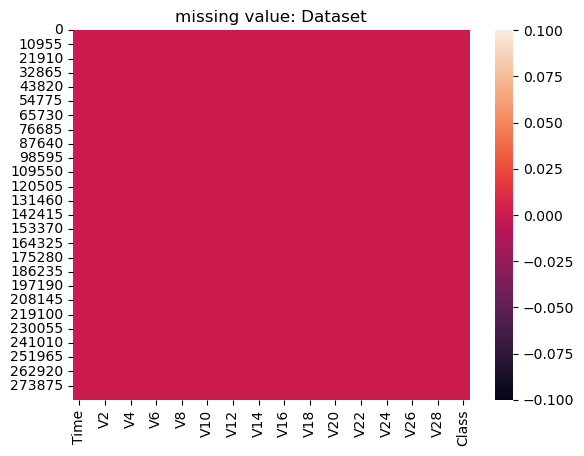

In [198]:
# Missing value Analysis 
plt.title("missing value: Dataset")
sns.heatmap(df.isnull())
plt.show()

* Dataset doesn't have missing values.so,dataset obtained is clean and clear.

In [199]:
# datatypes of features 
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

* So, all the features are numerical, there is no categorical features.

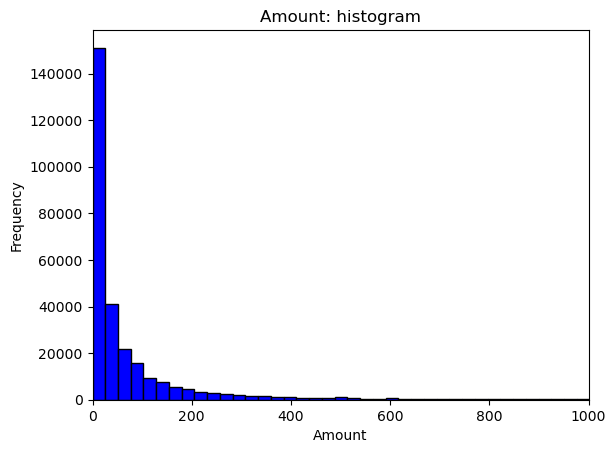

In [200]:
# Now, we can check the distribution of the feature Amount 
df["Amount"].plot(kind="hist",bins=1000,color="b",edgecolor="k",title="Amount: histogram")
plt.xlabel("Amount")
# Zooming using the plt.xlim() and plt.ylim() function
plt.xlim(0,1000)
plt.show()

* from the histogram, we understood that,the feature Amount is highly positively skewed.so, we have to apply some transfomration function to reduce the skeness of this feature 
* Majority of the people made transation less than 1000.

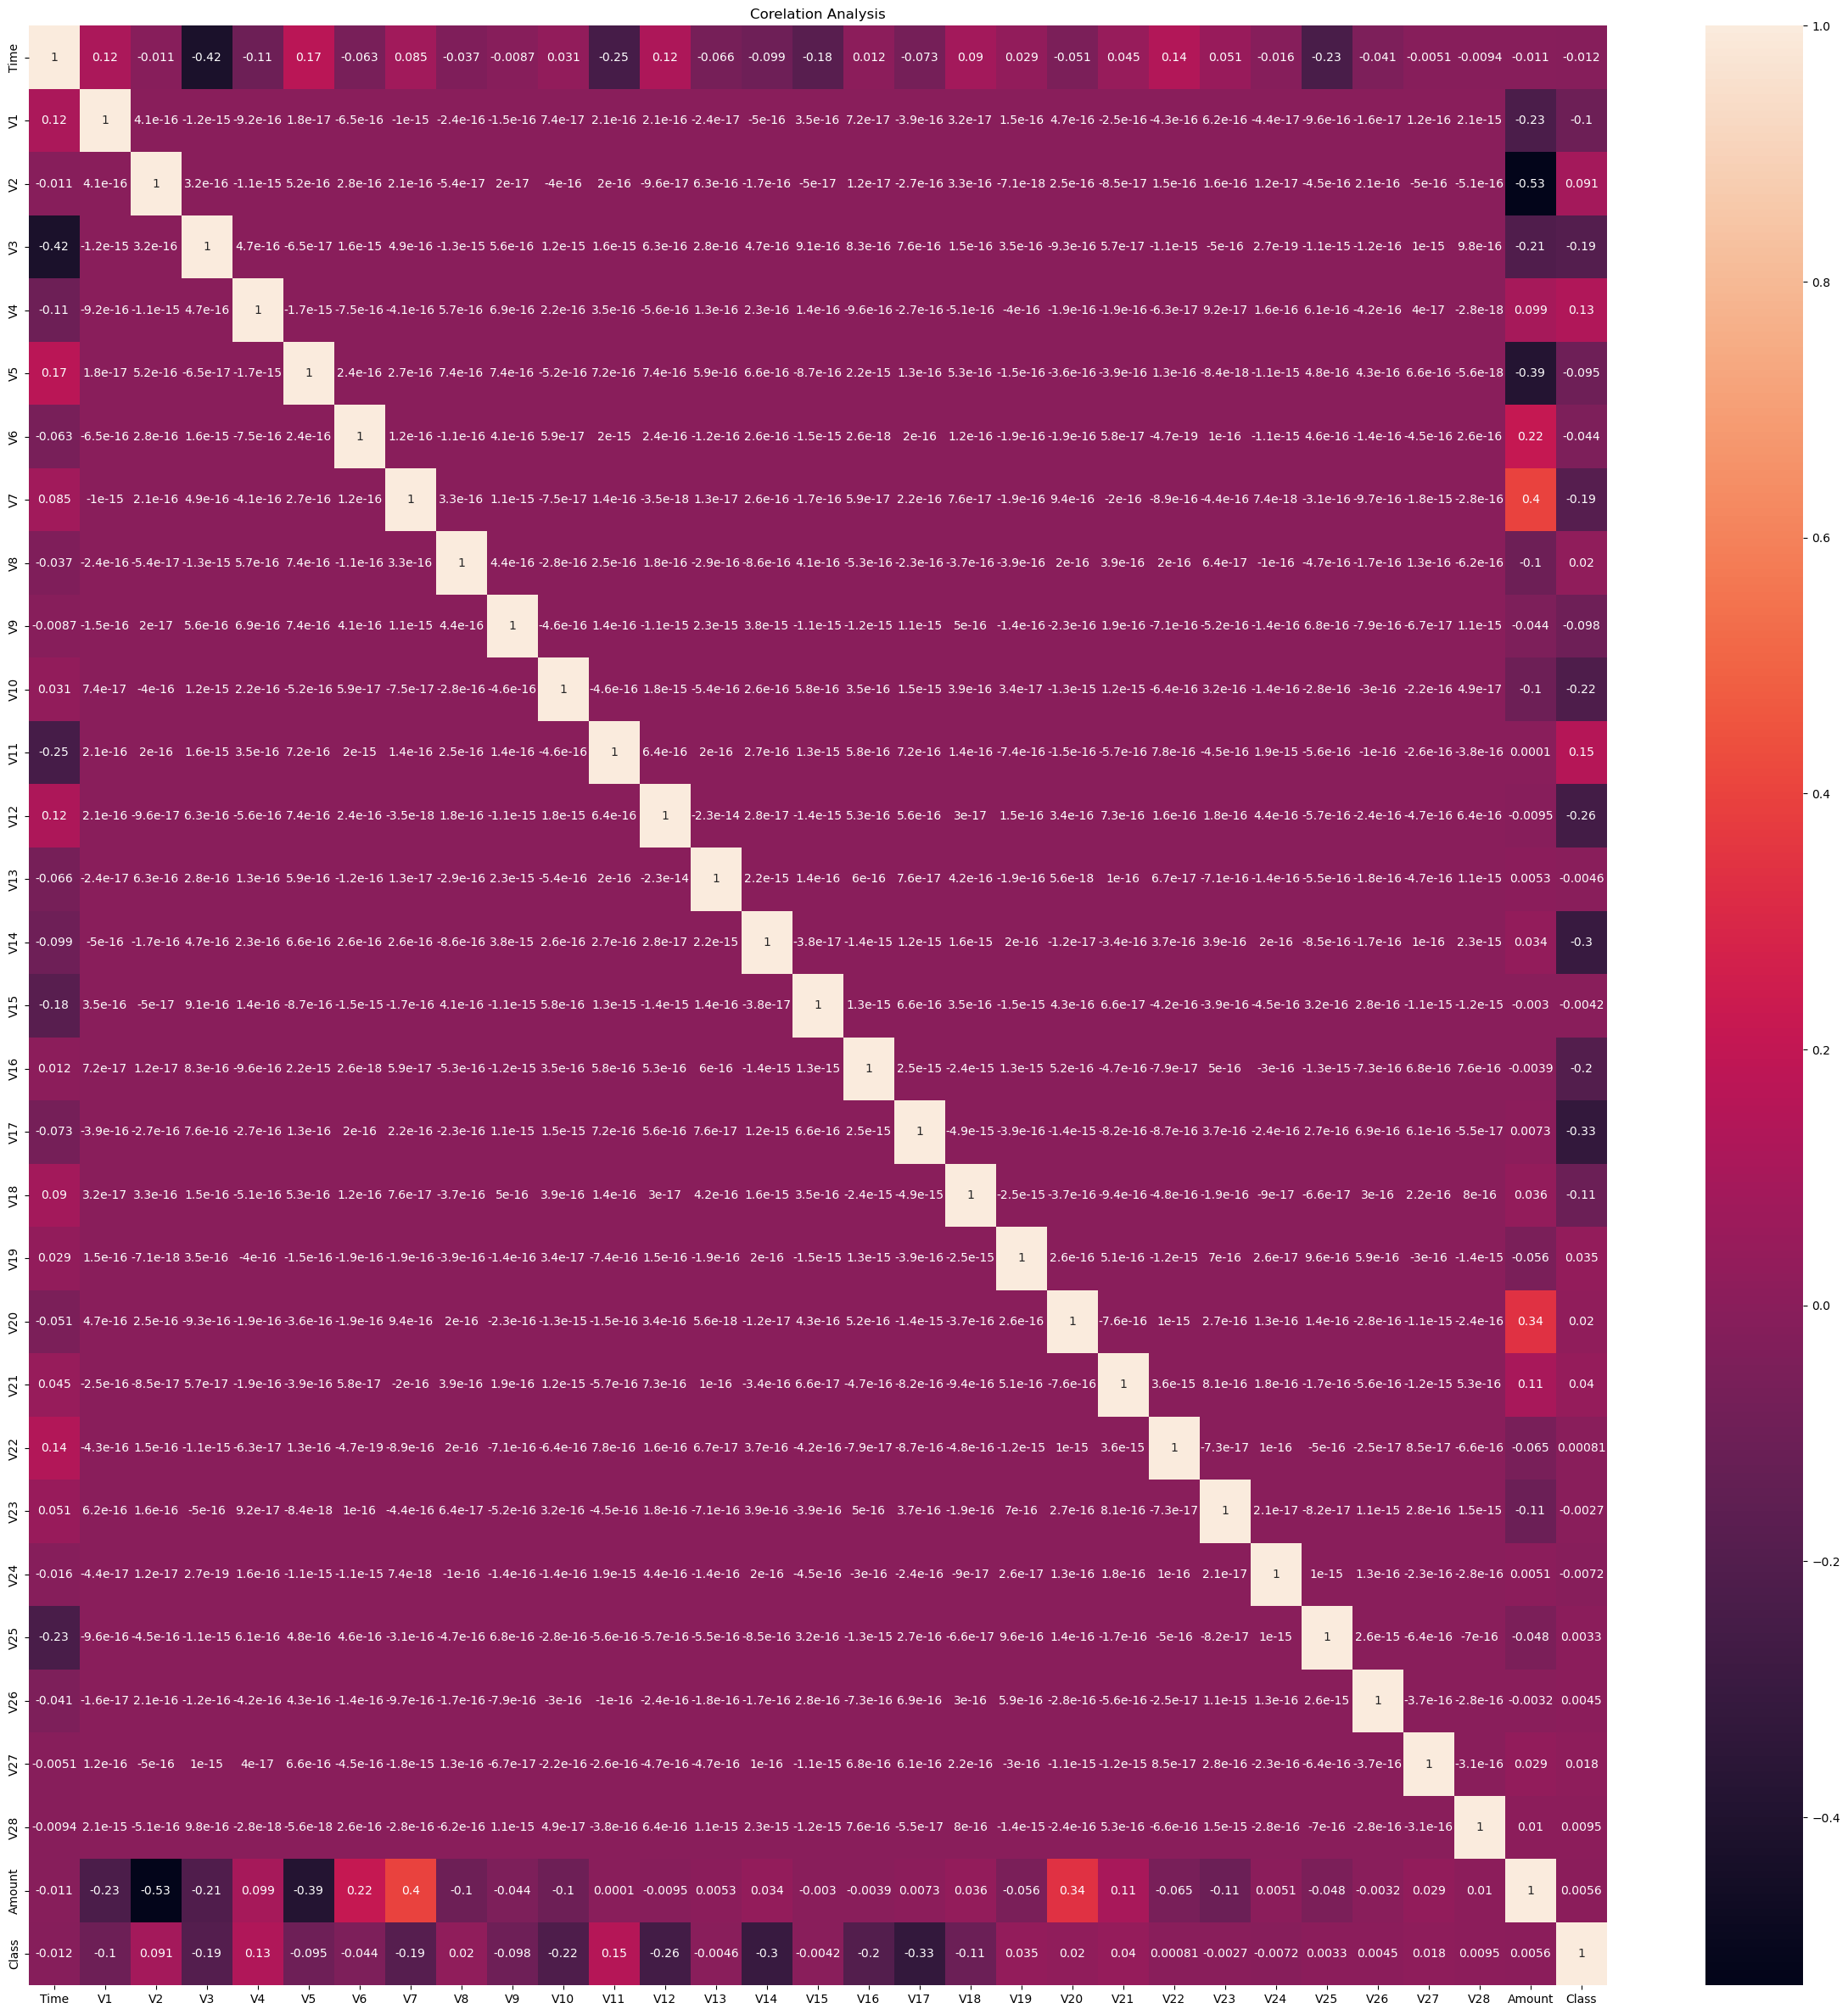

In [201]:
# Corelation analysis 
plt.figure(figsize=(30,30))
plt.title("Corelation Analysis")
sns.heatmap(df.corr(),annot=True)
plt.show()

* All the 28 features from V1-v28 are the result of the PCA trainsformation.and only time,Amount are not perfomed PCA
* Analysis from the corelation heatmap,
* class label is comparitively more corelated to the features V17(0.33),V16(0.2),V14(0.3),V12(0.26),V11(0.15),V12(0.19),V1(0.1)
* highly corelated/multicolinear features.
1. V2 - Amount(0.53)
2. V7 - Amount(0.4)
3. V20 - Amount(0.34)
4. V3 - Time(-0.42)

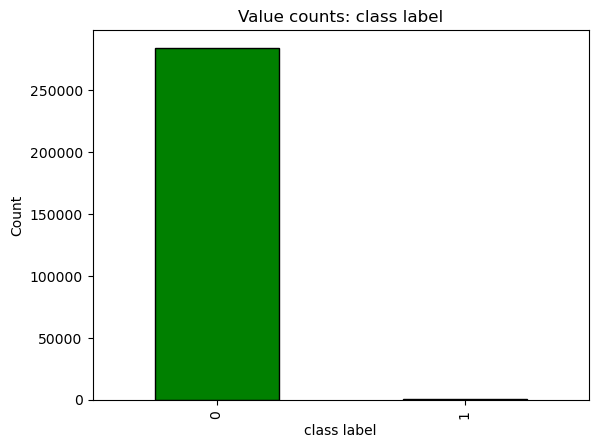

In [202]:
# class label frequency 
df["Class"].value_counts().plot(kind="bar",color="g",edgecolor="k",title="Value counts: class label")
plt.xlabel("class label")
plt.ylabel("Count")
plt.show()

In [203]:
# The value counts of 0 and 1(ie, non fraudulent transaction and the fraudulant transaction)
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

* So, the dataset is highly imbalanced.

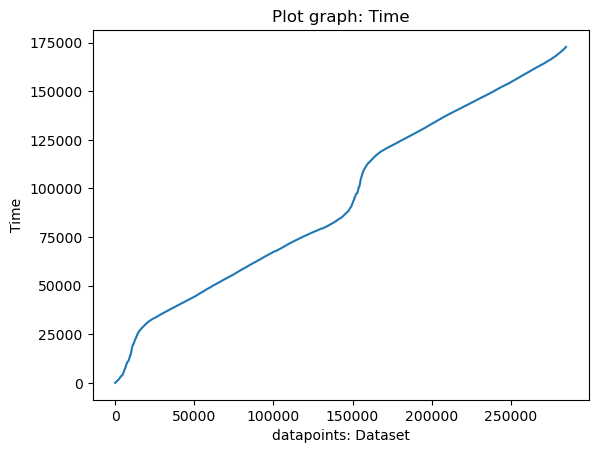

In [204]:
# time feature captures the time difference between each transaction and the first transaction recorded 
# in the dataset 
# lets take plot graph of this feature 
plt.title("Plot graph: Time")
plt.plot(df.index,df["Time"])
plt.ylabel("Time")
plt.xlabel("datapoints: Dataset")
plt.show()

In [205]:
# Amount of transaction and the Time corelation
df["Amount"].corr(df["Time"])

-0.01059637338902924

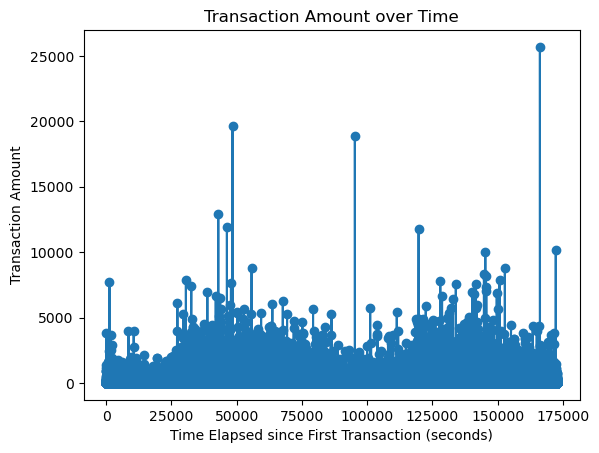

In [206]:
# plot graph for features between the time and Amount
plt.plot(df["Time"], df["Amount"], marker='o', linestyle='-')
plt.title("Transaction Amount over Time")
plt.xlabel("Time Elapsed since First Transaction (seconds)")
plt.ylabel("Transaction Amount")
plt.show()

In [207]:
# Statistical discription of the Amount feature
df["Amount"].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [208]:
# Statistical description of the Amount of the fraudulent transaction
df["Amount"][df["Class"] == 1].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

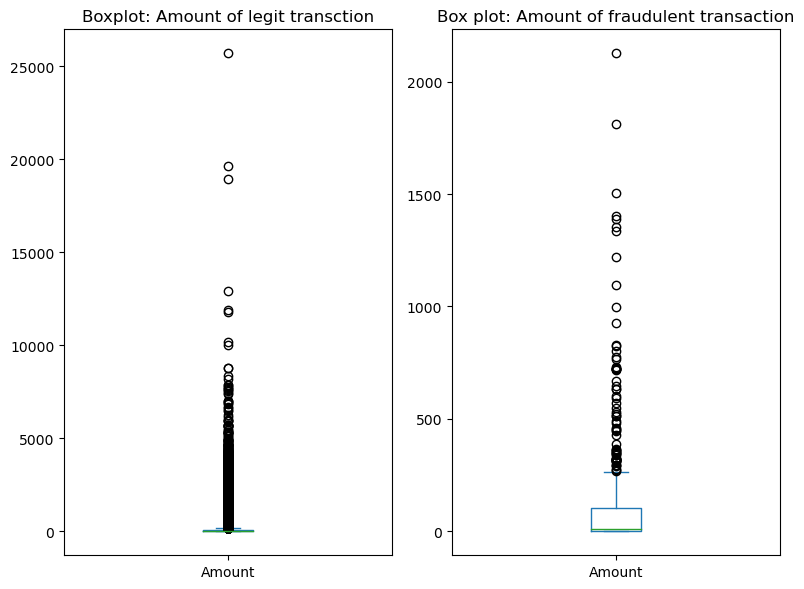

In [209]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plt.title("Boxplot: Amount of legit transction")
df["Amount"][df["Class"] == 0].plot(kind="box")
plt.subplot(1,2,2)
plt.title("Box plot: Amount of fraudulent transaction")
df["Amount"][df["Class"] == 1].plot(kind="box")
plt.tight_layout()
plt.show()

* So, from the box plot we undestand that the fraudulent transactions are in the range of 0-2000 dollors

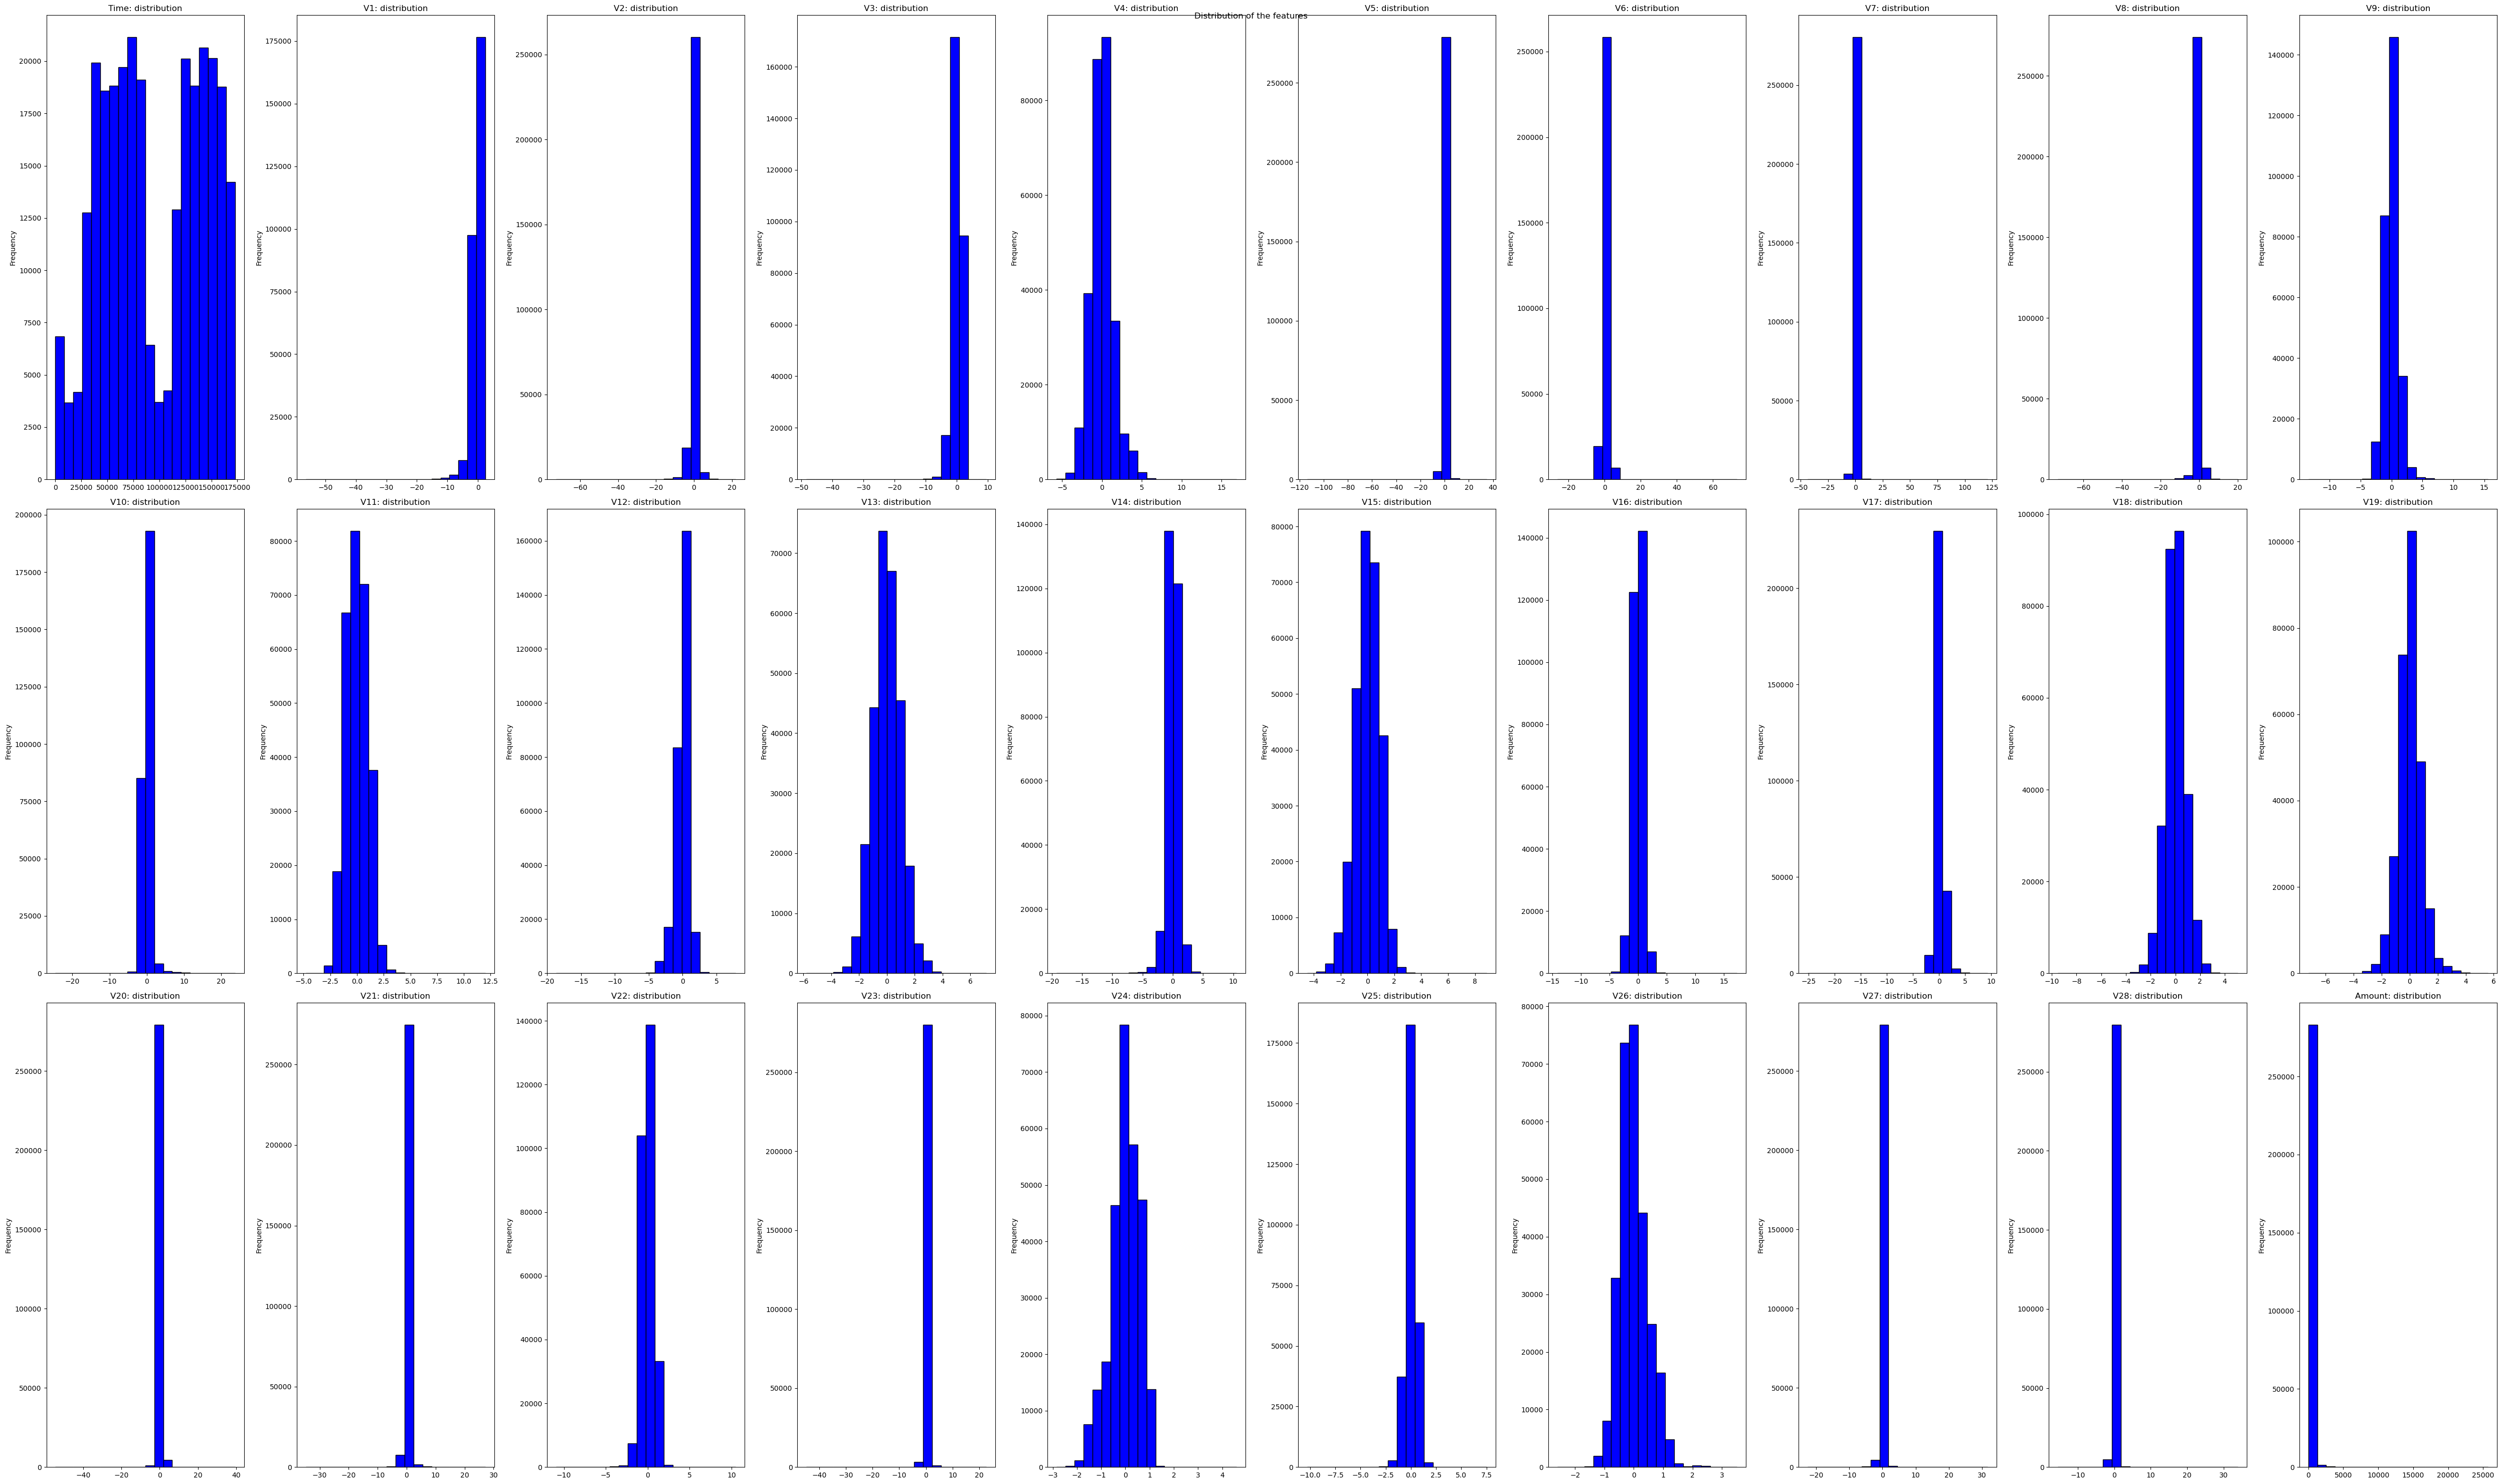

In [210]:
# Distribution of all the features 
i = 1
plt.figure(figsize=(50,30))
plt.suptitle("Distribution of the features")
for feature in df.columns:
    if feature != "Class":
        plt.subplot(3,10,i)
        i += 1
        df[feature].plot(kind="hist",bins=20,color="b",edgecolor="k",title=f"{feature}: distribution")
plt.tight_layout()
plt.show()

In [211]:
# fraudulent transactions
df[df["Class"]== 1].head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [212]:
# grouping the legit and fraudulent transaction
grouped_data = df.groupby(["Class"]).mean()
grouped_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


* here, we can find the pattern there is large difference in the values of the transaction legit and fraudulent transaction
* Since, the dataset is highly imbalanced isolation forest algorithm works very well for this dataset 
* As, per the instruction we can perfrom undersampling.Since, the model cannot find any pattern using this dataset we can make a Sample dataset containing the similar distribution of ligit transaction and the fraudulent transaction

### under Sampling

In [275]:
# Separating the legit and fraudulent transaction
fraudulent_transaction = df[df["Class"] == 1]
ligit_transaction = df[df["Class"] == 0]

In [276]:
# Random sampling from the ligit transaction to equalize the distribution of ligit and fraudulent 
Sample_ligit_transaction = ligit_transaction.sample(n = len(fraudulent_transaction),random_state=42)
Sample_ligit_transaction.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
138028,82450.0,1.314539,0.590643,-0.666593,0.716564,0.301978,-1.125467,0.388881,-0.288390,-0.132137,-0.597739,-0.325347,-0.216435,0.084204,-1.054631,0.967932,0.601226,0.631117,0.295078,-0.136151,-0.058040,-0.170307,-0.429655,-0.141341,-0.200195,0.639491,0.399476,-0.034321,0.031692,0.76,0
63099,50554.0,-0.798672,1.185093,0.904547,0.694584,0.219041,-0.319295,0.495236,0.139269,-0.760214,0.170547,0.821998,0.468322,-0.057550,0.573006,0.358688,-0.011633,-0.504570,0.722750,0.861541,-0.081298,0.202287,0.578699,-0.092245,0.013723,-0.246466,-0.380057,-0.396030,-0.112901,4.18,0
73411,55125.0,-0.391128,-0.245540,1.122074,-1.308725,-0.639891,0.008678,-0.701304,-0.027315,-2.628854,2.051312,0.575866,-0.594037,1.097880,-0.338340,0.617523,-0.756390,0.535141,1.016704,2.133828,0.065716,-0.133485,0.117403,-0.191748,-0.488642,-0.309774,0.008100,0.163716,0.239582,15.00,0
164247,116572.0,-0.060302,1.065093,-0.987421,-0.029567,0.176376,-1.348539,0.775644,0.134843,-0.149734,-1.238598,-0.841133,-0.586472,-0.779620,-0.436671,0.747871,0.266437,0.703234,0.916719,-0.189967,-0.169706,0.355576,0.907570,-0.018454,-0.126269,-0.339923,-0.150285,-0.023634,0.042330,57.00,0
148999,90434.0,1.848433,0.373364,0.269272,3.866438,0.088062,0.970447,-0.721945,0.235983,0.683491,1.166335,1.297531,-1.920966,1.885047,1.323225,-2.044482,1.317655,-0.441076,0.804104,-1.658339,-0.282777,0.103563,0.620954,0.197077,0.692392,-0.206530,-0.021328,-0.019823,-0.042682,0.00,0


In [277]:
# Concatinating the datasets
Sample_df = pd.concat([fraudulent_transaction,Sample_ligit_transaction],axis=0)
Sample_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [278]:
# Lets, check the number of trnsaction in this Sample datset
print("Number of transactions: ",len(Sample_df))

Number of transactions:  984


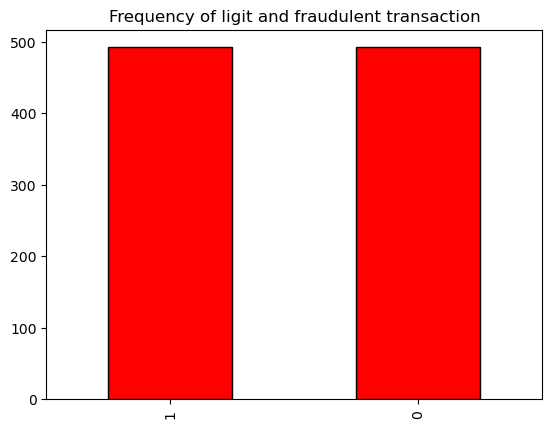

In [279]:
# frequency of the ligit and fraudulent and the Sample datset 
Sample_df["Class"].value_counts().plot(kind="bar",color="r",edgecolor="k",title="Frequency of ligit and fraudulent transaction")
plt.show()

In [280]:
# value_counts
Sample_df["Class"].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [281]:
# Now grouping the transacton and taking the mean of it 
df.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


* So, patten is not lost as comapring with the orginal dataframe

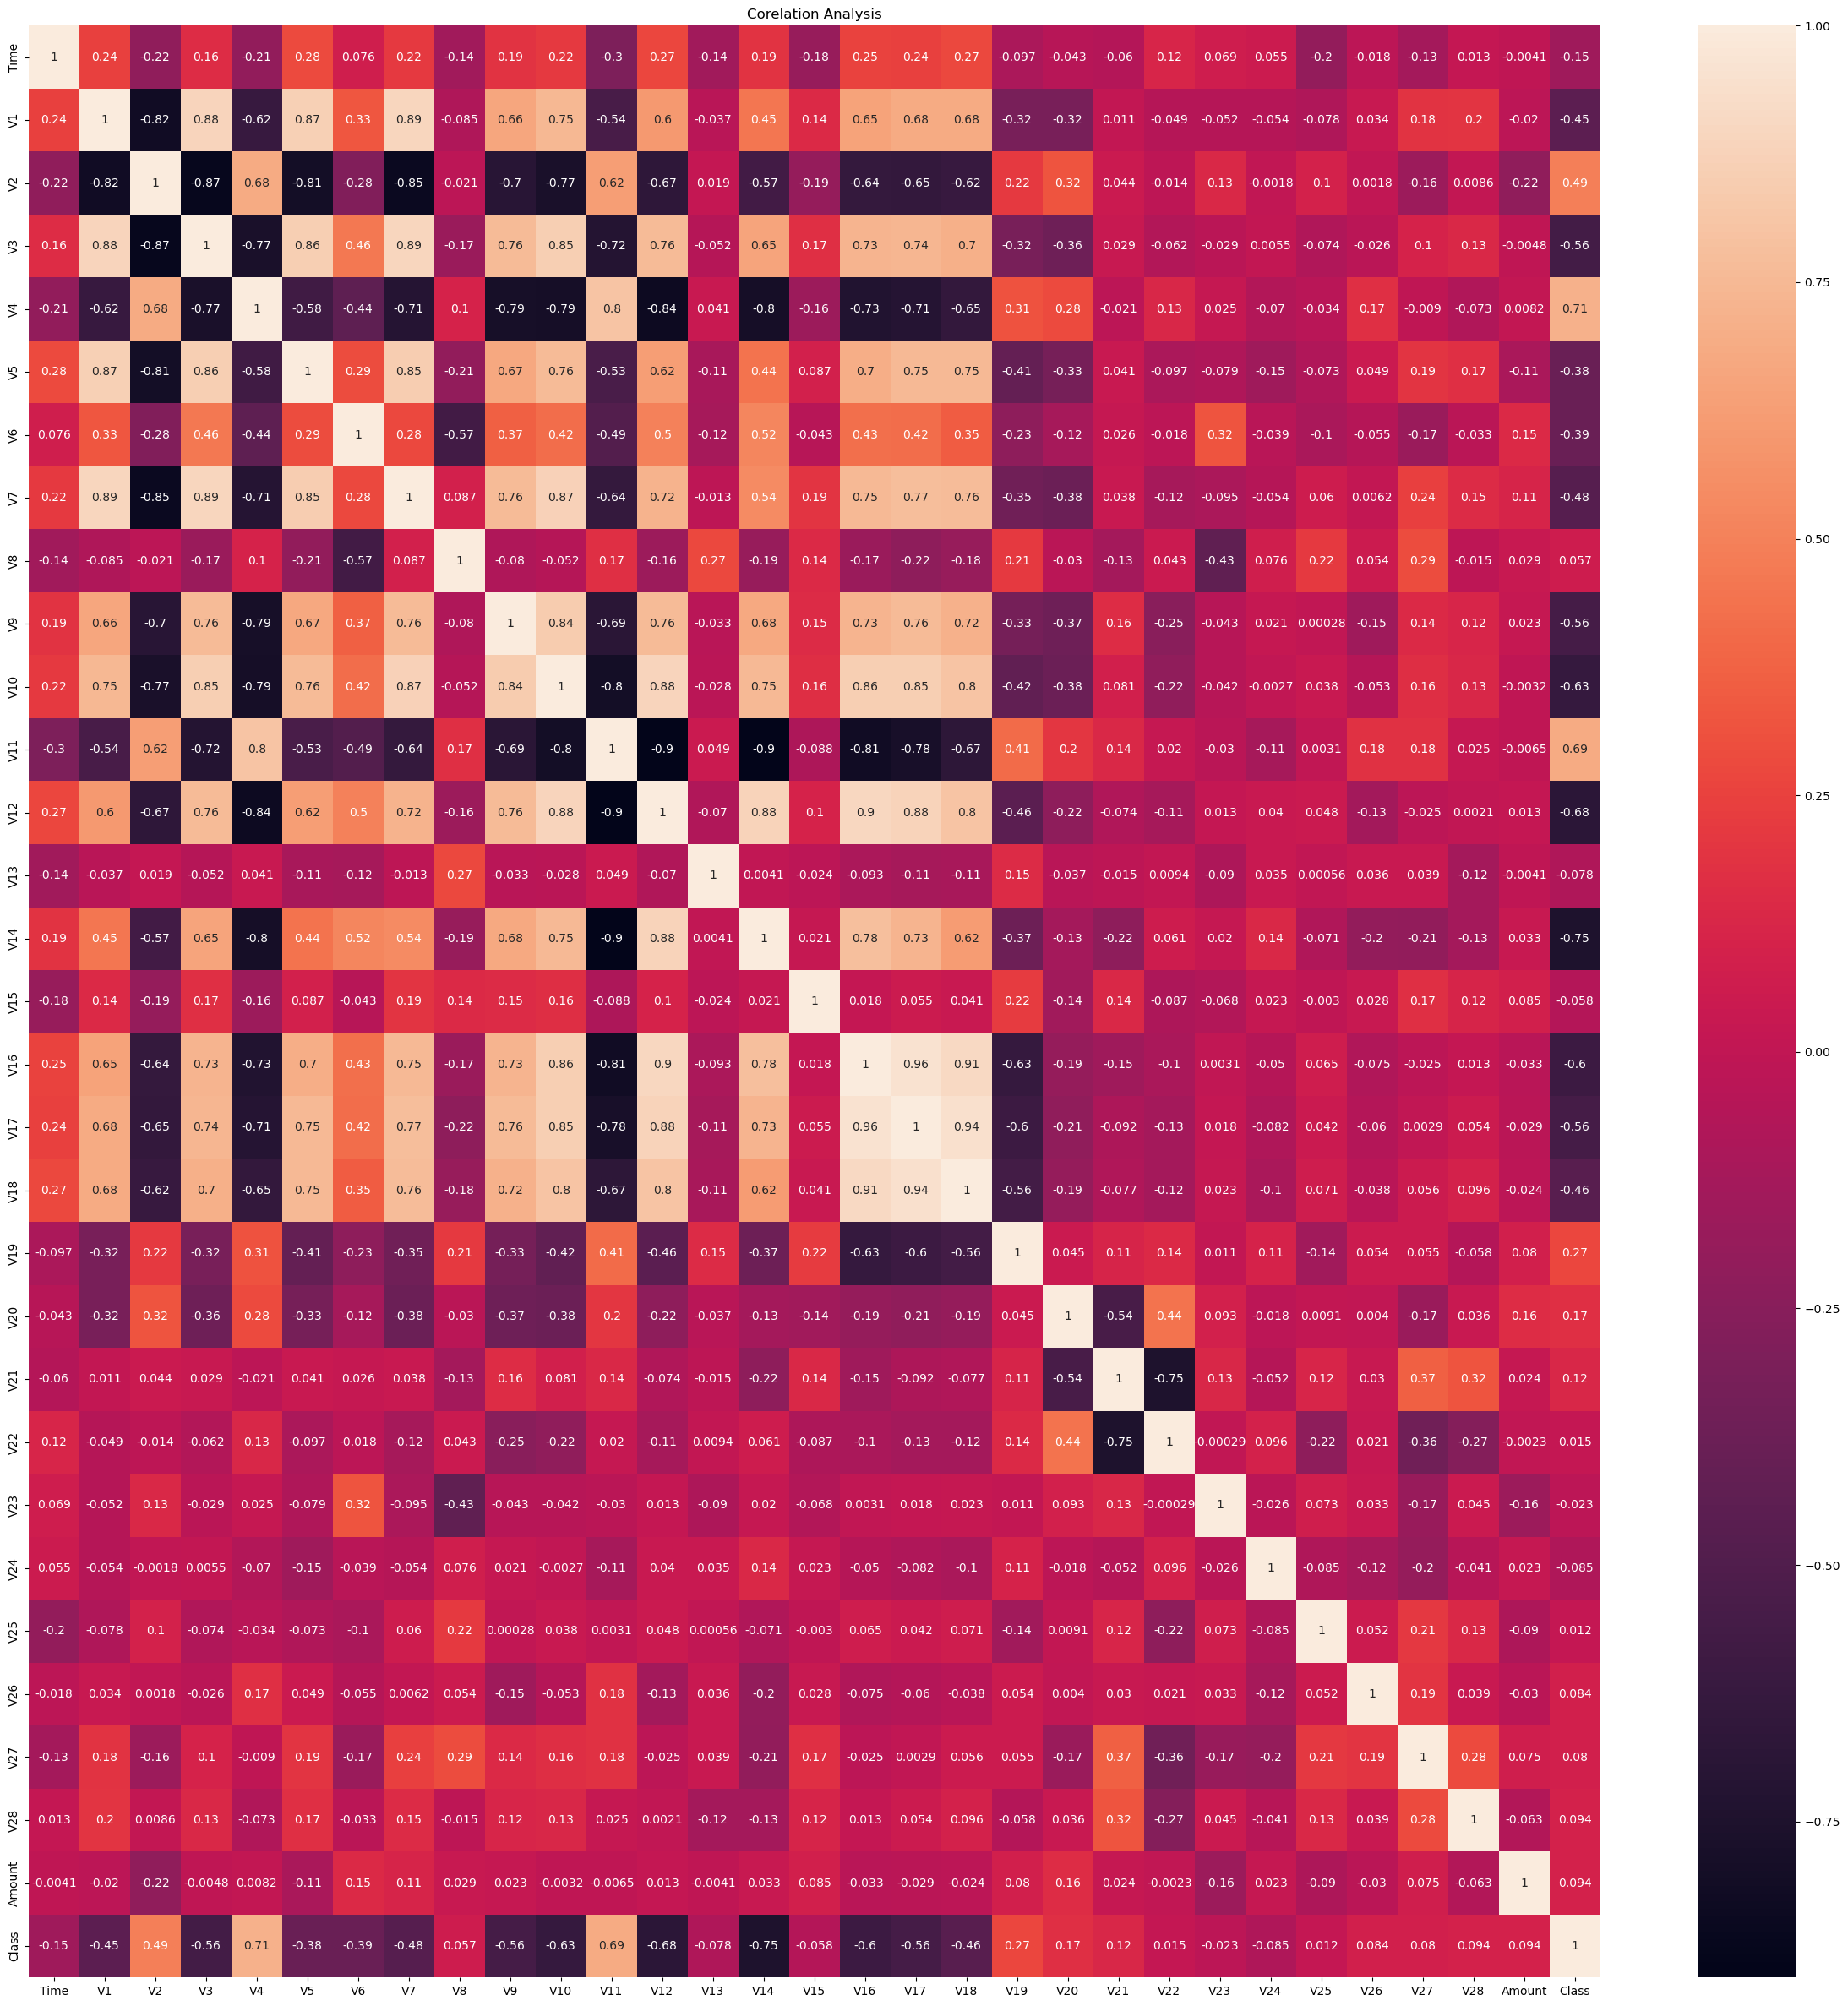

In [282]:
# lets, check the corelation of the features. does it improves or not 
plt.figure(figsize=(30,30))
plt.title("Corelation Analysis")
sns.heatmap(Sample_df.corr(),annot=True)
plt.show()

* from the heat map, we understood that the corelation of the features has been imporoved a lot.
* Analysis,
* features with high corelation with the target features (> 0.2): 
    1.V16(-0.6)
    2.V17(-0.56)
    3.V18(-0.46)
    4.V19(0.27)
    5.V14(-0.75)
    6.V9(-0.56)
    7.V10(-0.63)
    8.V11(0.69)
    9.V12(-0.68)
    10.V1(-0.45)
    11.V2(0.49)
    12.V3(0.56)
    13.V4(-0.71)
    14.V5(-0.38)
    15.V6(-0.39)
    16.V7(-0.48)
* Multicolenear features(>0.7),There are so many multi coleanear features 

### Multicolnear feature: feature Engineering

In [283]:
# Multicolenear features,(threshold >= 0.9)
corelated_features = []

for feature in df.columns:
    count = 0
    for c in df.columns:
        if c != feature and abs(Sample_df[feature].corr(Sample_df[c])) > 0.9:
            count += 1
            # Adding the feature to the corelated feature list 
            if feature not in corelated_features:
                corelated_features.append(feature)
    # Print the number of corelated features
    print(f"{feature}: No of mulicolinear features {count}")
corelated_features

Time: No of mulicolinear features 0
V1: No of mulicolinear features 0
V2: No of mulicolinear features 0
V3: No of mulicolinear features 0
V4: No of mulicolinear features 0
V5: No of mulicolinear features 0
V6: No of mulicolinear features 0
V7: No of mulicolinear features 0
V8: No of mulicolinear features 0
V9: No of mulicolinear features 0
V10: No of mulicolinear features 0
V11: No of mulicolinear features 1
V12: No of mulicolinear features 2
V13: No of mulicolinear features 0
V14: No of mulicolinear features 0
V15: No of mulicolinear features 0
V16: No of mulicolinear features 3
V17: No of mulicolinear features 2
V18: No of mulicolinear features 2
V19: No of mulicolinear features 0
V20: No of mulicolinear features 0
V21: No of mulicolinear features 0
V22: No of mulicolinear features 0
V23: No of mulicolinear features 0
V24: No of mulicolinear features 0
V25: No of mulicolinear features 0
V26: No of mulicolinear features 0
V27: No of mulicolinear features 0
V28: No of mulicolinear feat

['V11', 'V12', 'V16', 'V17', 'V18']

In [284]:
# removing the multicoleanear features
Sample_df.drop(columns=corelated_features,inplace=True)

### Training the model(Logistic regression and Random Forest)

In [285]:
# Separating the target feature
X = Sample_df.drop(columns="Class")
y = Sample_df["Class"]

### Scaling using Standerd Scaler

In [286]:
#scaler = StandardScaler()
#X = scaler.fit_transform(X)

### Splitting the dataset

In [287]:
# Spliting the dataset in train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_pred = logreg_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [293]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((787, 25), (197, 25), (787,), (197,))

### Evaluation of the model using accuracy score,Confusion Matrix,Classification report

In [290]:
# Evaluate Logistic Regression
print("Logistic Regression Results:")
logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_conf_matrix = confusion_matrix(y_test, logreg_pred)
logreg_classification_report = classification_report(y_test, logreg_pred)
pred_x = logreg_model.predict(X_train)

print("Accuracy-train: ",accuracy_score(pred_x,y_train))
print(f"Accuracy: {logreg_accuracy}")
print("Confusion Matrix:")
print(logreg_conf_matrix)
print("Classification Report:")
print(logreg_classification_report)
print("\n")

# Evaluate Random Forest
print("Random Forest Results:")
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)
rf_classification_report = classification_report(y_test, rf_pred)
pred_x = rf_model.predict(X_train)

print("Accuracy-train: ",accuracy_score(pred_x,y_train))
print(f"Accuracy: {rf_accuracy}")
print("Confusion Matrix:")
print(rf_conf_matrix)
print("Classification Report:")
print(rf_classification_report)

Logistic Regression Results:
Accuracy-train:  0.940279542566709
Accuracy: 0.9543147208121827
Confusion Matrix:
[[97  1]
 [ 8 91]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96        98
           1       0.99      0.92      0.95        99

    accuracy                           0.95       197
   macro avg       0.96      0.95      0.95       197
weighted avg       0.96      0.95      0.95       197



Random Forest Results:
Accuracy-train:  1.0
Accuracy: 0.9543147208121827
Confusion Matrix:
[[97  1]
 [ 8 91]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96        98
           1       0.99      0.92      0.95        99

    accuracy                           0.95       197
   macro avg       0.96      0.95      0.95       197
weighted avg       0.96      0.95      0.95       197



* first try , we got about 95.93% accurcy from random forest and 95.43% accuracy from Logistic regression
* Random forest is overfitted.
* and logistic regression is best suited 

### tesing on large dataset to evaluate the performance

In [300]:
# picking 2 lacks dataset randomly for evaluation
s = df.sample(n=200000,random_state=42)
s.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,5.299236,-10.834006,1.671120,-9.373859,0.360806,-9.899247,-19.236292,-8.398552,3.101735,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,-0.565012,-0.087670,0.979427,0.076883,-0.217884,-0.136830,-2.142892,0.126956,1.752662,0.432546,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,0.756801,0.543827,0.112453,1.075384,-0.245772,0.180483,1.769860,-0.533172,-0.533300,1.192245,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0
276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,-1.328335,0.223621,1.132627,-0.550875,0.616568,0.497974,0.502195,0.981343,0.101264,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0
278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,0.259452,0.942162,0.850038,-0.616166,0.592634,-0.603845,0.091077,-0.471867,-0.333816,0.404711,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0


In [301]:
S_X = s.drop(columns=["Class"])
S_Y = s["Class"]

In [302]:
# removing the multicoleanear features
S_X.drop(columns=corelated_features,inplace=True)

In [303]:
# predicting with 2 lacks of dataset using logistic regression
logreg_pred = logreg_model.predict(S_X)
# Evaluation of the model
print("Accuracy_score using logistic regression" ,accuracy_score(logreg_pred,S_Y))
confusion_matrix(logreg_pred,S_Y)

Accuracy_score using logistic regression 0.964845


array([[192665,     30],
       [  7001,    304]])

* So,Model giving 96.48% accuracy on large dataset.ie, the model is working very well
* so,alomost 304 of 334 fraudulent transaction has been cached by our model